In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.worldweatheronline.com/toronto-weather-averages/ontario/ca.aspx'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [3]:
soup.find_all('table')

[<table class="table table-striped"><thead class="thead-dark"><tr><th scope="col">Month</th><th scope="col">Day</th><th scope="col">Night</th><th scope="col">Rain Days</th></tr></thead><tbody>
 <tr><td>January</td><td>-1°c</td><td>-7°c</td><td>9</td></tr>
 <tr><td>February</td><td>-1°c</td><td>-7°c</td><td>9</td></tr>
 <tr><td>March</td><td>4°c</td><td>-2°c</td><td>7</td></tr>
 <tr><td>April</td><td>9°c</td><td>3°c</td><td>9</td></tr>
 <tr><td>May</td><td>16°c</td><td>9°c</td><td>8</td></tr>
 <tr><td>June</td><td>21°c</td><td>14°c</td><td>9</td></tr>
 <tr><td>July</td><td>25°c</td><td>18°c</td><td>9</td></tr>
 <tr><td>August</td><td>25°c</td><td>19°c</td><td>8</td></tr>
 <tr><td>September</td><td>22°c</td><td>15°c</td><td>6</td></tr>
 <tr><td>October</td><td>15°c</td><td>9°c</td><td>9</td></tr>
 <tr><td>November</td><td>8°c</td><td>3°c</td><td>6</td></tr>
 <tr><td>December</td><td>2°c</td><td>-2°c</td><td>9</td></tr>
 </tbody></table>,
 <table class="table">
 <thead>
 <tr>
 <th>
 <img 

In [4]:
table = soup.find_all('table')[0]

In [5]:
data = []
for row in table.find_all('tr'):
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)

In [6]:
df = pd.DataFrame(data[1:], columns=data[0])

In [7]:
df

,Month,Day,Night,Rain Days
0,January,-1°c,-7°c,9
1,February,-1°c,-7°c,9
2,March,4°c,-2°c,7
3,April,9°c,3°c,9
4,May,16°c,9°c,8
5,June,21°c,14°c,9
6,July,25°c,18°c,9
7,August,25°c,19°c,8
8,September,22°c,15°c,6
9,October,15°c,9°c,9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      12 non-null     object
 1   Day        12 non-null     object
 2   Night      12 non-null     object
 3   Rain Days  12 non-null     object
dtypes: object(4)
memory usage: 512.0+ bytes


In [9]:
df.rename(columns={"Day":"Day(°c)", "Night":"Night(°c)"},inplace=True)
df['Day(°c)'] = df['Day(°c)'].str.replace('°c', '').astype(int)
df['Night(°c)'] = df['Night(°c)'].str.replace('°c', '').astype(int)
df['Rain Days'] = df['Rain Days'].astype(int)

In [10]:
df

,Month,Day(°c),Night(°c),Rain Days
0,January,-1,-7,9
1,February,-1,-7,9
2,March,4,-2,7
3,April,9,3,9
4,May,16,9,8
5,June,21,14,9
6,July,25,18,9
7,August,25,19,8
8,September,22,15,6
9,October,15,9,9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      12 non-null     object
 1   Day(°c)    12 non-null     int32 
 2   Night(°c)  12 non-null     int32 
 3   Rain Days  12 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 368.0+ bytes


In [12]:
df.describe()

,Day(°c),Night(°c),Rain Days
count,12.000000,12.000000,12.000000
mean,12.083333,6.000000,8.166667
std,9.866917,9.341987,1.193416
min,-1.000000,-7.000000,6.000000
25%,3.500000,-2.000000,7.750000
50%,12.000000,6.000000,9.000000
75%,21.250000,14.250000,9.000000
max,25.000000,19.000000,9.000000


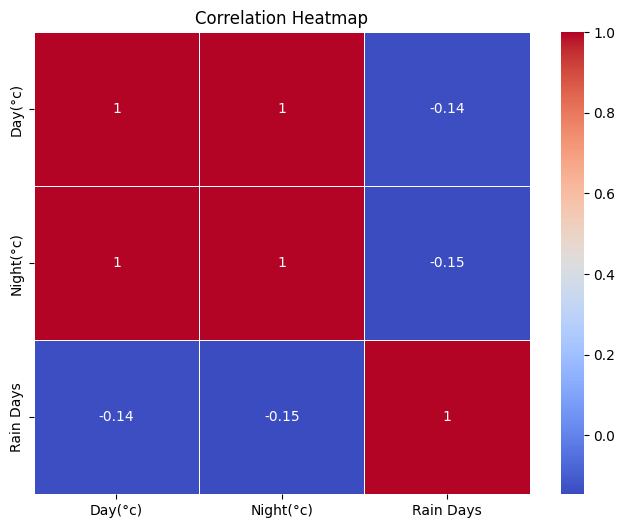

In [13]:
correlation_matrix = df[['Day(°c)', 'Night(°c)', 'Rain Days']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

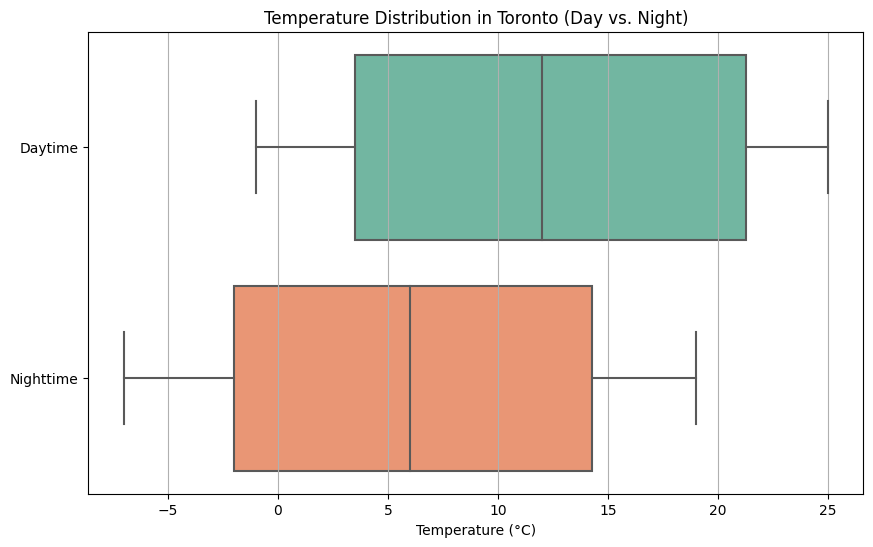

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Day(°c)', 'Night(°c)']], orient='h', palette='Set2')
plt.title('Temperature Distribution in Toronto (Day vs. Night)')
plt.xlabel('Temperature (°C)')
plt.yticks([0, 1], ['Daytime', 'Nighttime'])
plt.grid(axis='x')
plt.show()

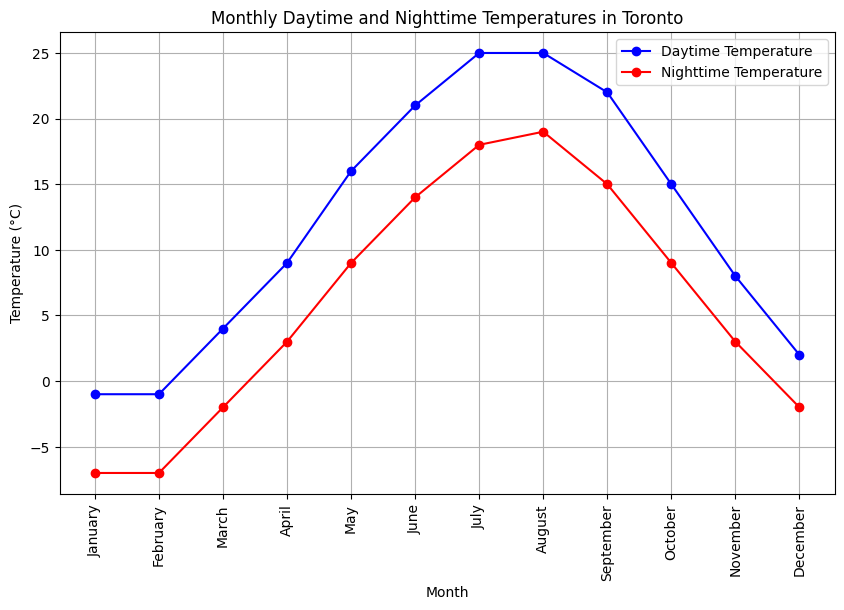

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Day(°c)'], label='Daytime Temperature', marker='o', linestyle='-', color='b')
plt.plot(df['Month'], df['Night(°c)'], label='Nighttime Temperature', marker='o', linestyle='-', color='r')

plt.title('Monthly Daytime and Nighttime Temperatures in Toronto')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

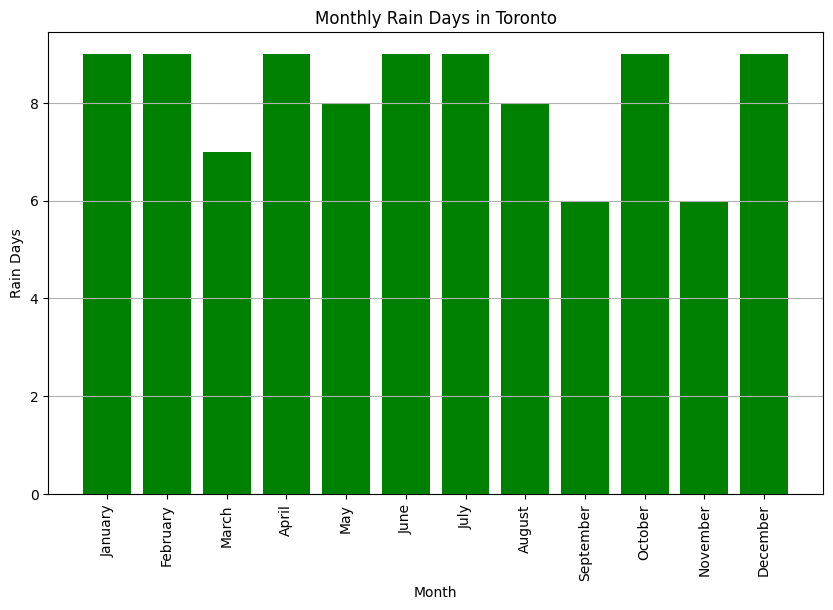

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(df['Month'], df['Rain Days'], color='g')

plt.title('Monthly Rain Days in Toronto')
plt.xlabel('Month')
plt.ylabel('Rain Days')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.show()

In [17]:
df.to_csv('toronto_weather_averages.csv', index=False)